In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [35]:
columns = [columns for columns in df.columns]
columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in columns:
    df[col] = encoder.fit_transform(df[col])

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=101)
dt = DecisionTreeClassifier(random_state=101)

In [32]:
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf.score(X_test, y_test), dt.score(X_test, y_test)

(1.0, 1.0)

model sudah cukup baik, jadi tidak perlu di melakukan hyperparameter tuning. Tetapi kita bisa mengecek fitur-fitur apa saja yang berpengaruh besar pada model, yang mana dapat kita pilih dan gunakan untuk training selanjutnya sehingga tidak terlalu banyak menggunakan fitur

In [25]:
rf.feature_importances_

array([0.00431385, 0.01080494, 0.01452535, 0.04681729, 0.16767381,
       0.0013571 , 0.03904121, 0.11091334, 0.13195746, 0.02889748,
       0.06758675, 0.04338405, 0.04891212, 0.01479581, 0.01629417,
       0.        , 0.00211833, 0.01618192, 0.06861459, 0.08246488,
       0.05378703, 0.02955851])

Text(0.5, 1.0, 'Feature Importances on Decision Tree')

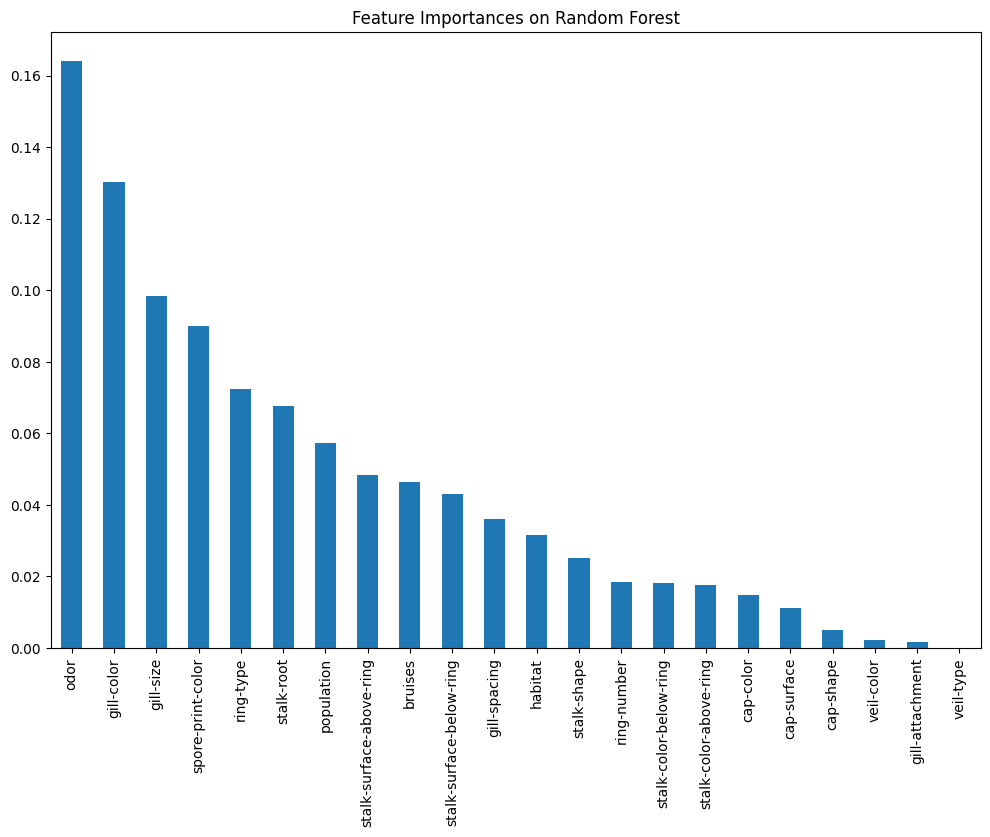

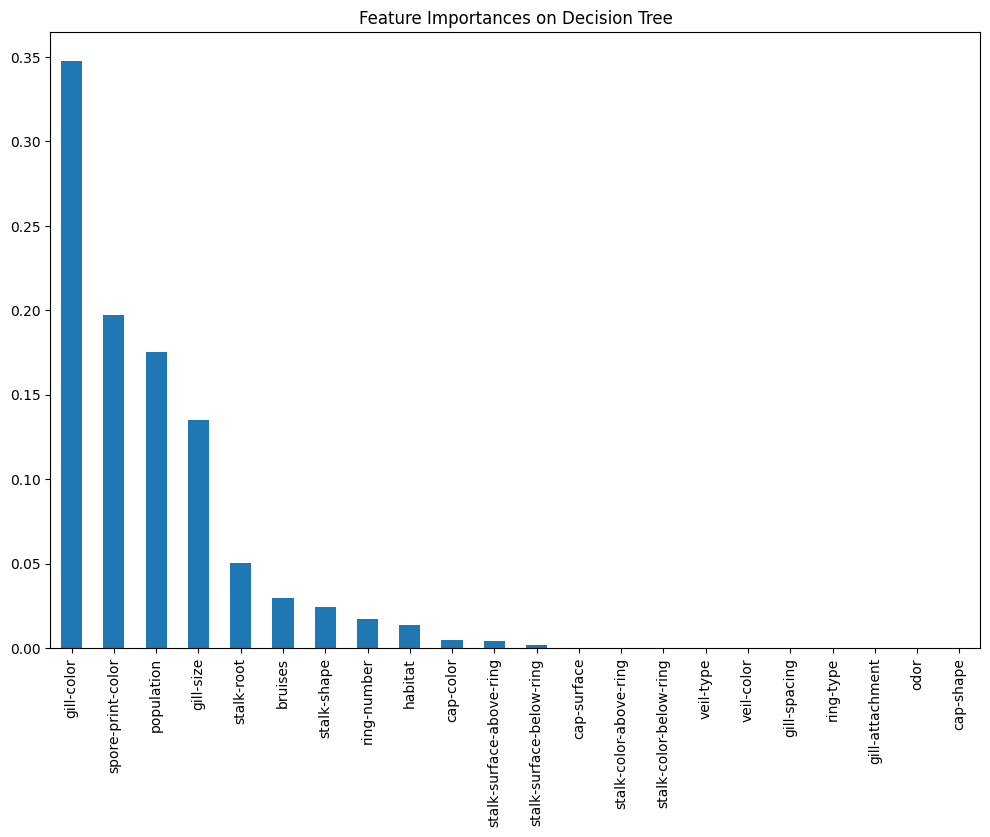

In [36]:
# plot feature importances
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(12, 8))
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances on Random Forest')
plt.subplots(figsize=(12, 8))
pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances on Decision Tree')

